In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


In [59]:

df_muts  = pd.read_csv("../sandbox/PyR0_Ranked_Mutations.tsv", sep="\t")
df_muts["Category"] = df_muts["mutation"].apply(lambda z: z.split(':')[0])
df_muts["Mutation"] = df_muts["mutation"].apply(lambda z: z.split(':')[1])
df_muts.rename(columns={"Run date": "RunDate",
                            "rank": "Rank"},
                inplace=True)
df_muts['RunDate'] = pd.to_datetime(df_muts['RunDate'])


df_muts["AvgRank"] = df_muts.groupby(["Category", "RunDate"])["Rank"].transform("mean")
df_muts["MaxRank"] = df_muts.groupby(["Category", "RunDate"])["Rank"].transform("min")


In [60]:
df_muts

,Rank,mutation,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages,RunDate,Category,Mutation,AvgRank,MaxRank
0,1,S:N969K,1495.140,485423.0,0.180859,0.180622,0.181096,1.198250,1.197960,1.198530,"B.1.1.529, BA.1 (B.1.1.529.1), BA.1.1 (B.1.1.5...",2021-03-12,S,N969K,1775.835145,1
1,2,S:L452Q,1468.680,468393.0,0.164477,0.164257,0.164696,1.178780,1.178520,1.179040,"B.1.1.374, BA.2.12.1 (B.1.1.529.2.12.1), BG.1 ...",2021-03-12,S,L452Q,1775.835145,1
2,3,E:T9I,1349.860,395670.0,0.139596,0.139393,0.139799,1.149810,1.149580,1.150040,"B.1.1, B.1.1.529, BA.1 (B.1.1.529.1), BA.1.1 (...",2021-03-12,E,T9I,1387.458333,3
3,4,S:Q954H,1344.710,392657.0,0.179024,0.178763,0.179285,1.196050,1.195740,1.196360,"B.1.1, B.1.1.529, BA.1 (B.1.1.529.1), BA.1.1 (...",2021-03-12,S,Q954H,1775.835145,1
4,5,ORF1b:I1566V,1328.950,383512.0,0.162685,0.162445,0.162925,1.176670,1.176380,1.176950,"B.1.1.529, BA.1 (B.1.1.529.1), BA.1.1 (B.1.1.5...",2021-03-12,ORF1b,I1566V,2068.277628,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293834,3782,ORF1a:A876T,-337.487,-24735.5,-0.118951,-0.119642,-0.118260,0.887851,0.887238,0.888465,"B.3, B.3.1",2024-03-04,ORF1a,A876T,2050.414753,7
293835,3783,N:L219F,-359.930,-28134.3,-0.076926,-0.077344,-0.076507,0.925959,0.925571,0.926347,"EG.1 (XBB.1.9.2.1), EG.1.1 (XBB.1.9.2.1.1), EG...",2024-03-04,N,L219F,1801.129032,28
293836,3784,ORF3a:G251V,-370.590,-29825.2,-0.149661,-0.150452,-0.148869,0.861000,0.860319,0.861682,"B.28, B.29, B.30, B.31, B.32, B.33, B.34, B.35...",2024-03-04,ORF3a,G251V,1892.622807,31
293837,3785,S:Q493R,-581.843,-73516.4,-0.260846,-0.261724,-0.259967,0.770400,0.769723,0.771077,"B.1.1.529, BA.1 (B.1.1.529.1), BA.1.1 (B.1.1.5...",2024-03-04,S,Q493R,1611.018277,1


In [61]:
df_muts["Category"].unique()

array(['S', 'E', 'ORF1b', 'ORF3a', 'ORF1a', 'N', 'M', 'ORF9b', 'ORF14',
       'ORF7b', 'ORF7a', 'ORF10', 'ORF8', 'ORF6'], dtype=object)

In [62]:
len(df_muts["Mutation"].unique())

5568

In [63]:
df_muts["RunDate"]

0        2021-03-12
1        2021-03-12
2        2021-03-12
3        2021-03-12
4        2021-03-12
            ...    
293834   2024-03-04
293835   2024-03-04
293836   2024-03-04
293837   2024-03-04
293838   2024-03-04
Name: RunDate, Length: 293839, dtype: datetime64[ns]

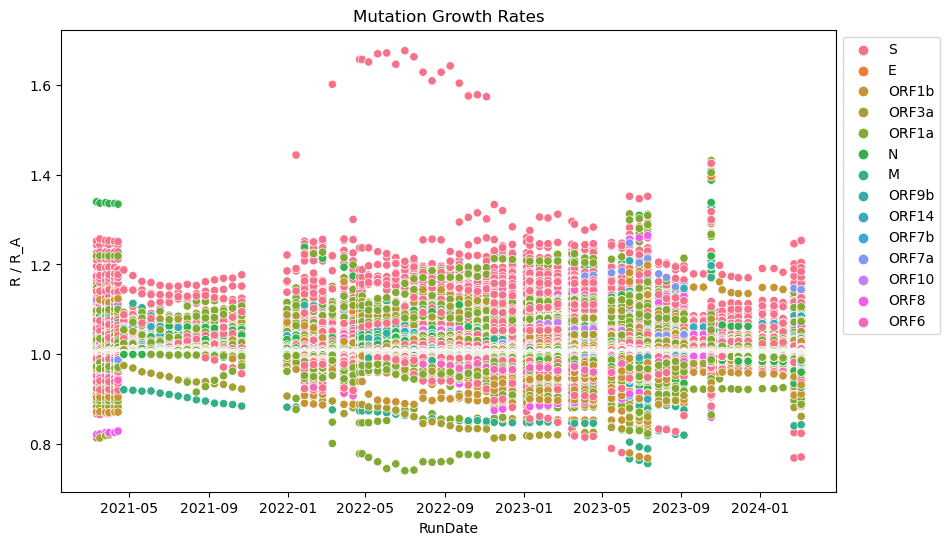

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data = df_muts,
                x = "RunDate",
                y = "R / R_A",
                hue = "Category")
ax.set_title("Mutation Growth Rates")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

Text(0.5, 1.0, 'Average Rank of COVID-19 Mutation Categories')

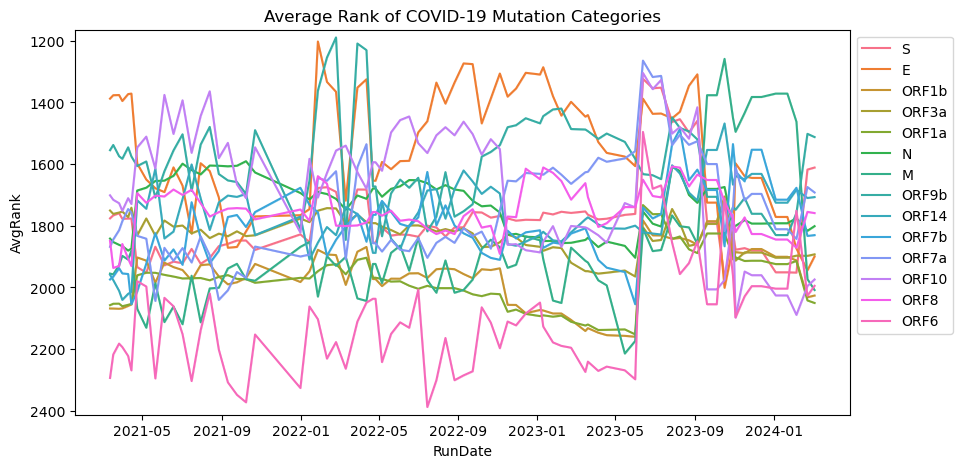

In [65]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = df_muts,
                x = "RunDate",
                y = "AvgRank",
                hue = "Category")
ax.set_ylim([max(df_muts["AvgRank"])+25, min(df_muts["AvgRank"])-25])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title("Average Rank of COVID-19 Mutation Categories")

Text(0.5, 1.0, 'Highest Rank of COVID-19 Mutation Categories')

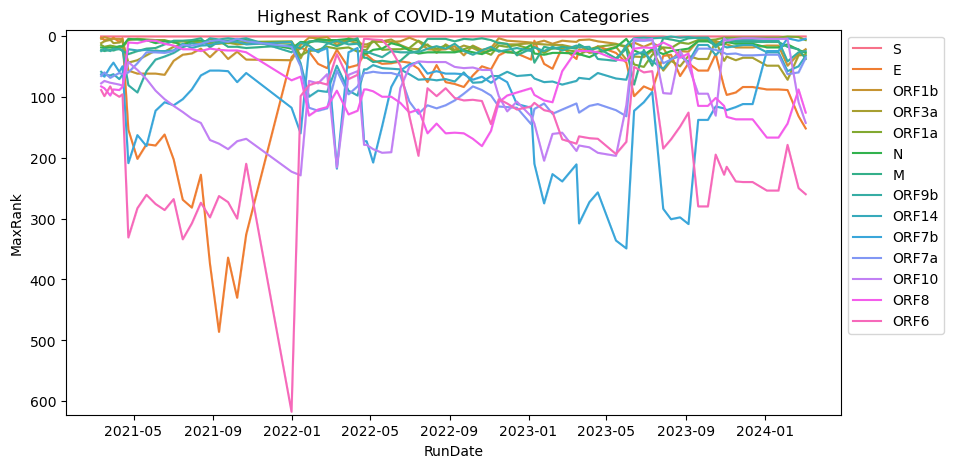

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = df_muts,
                x = "RunDate",
                y = "MaxRank",
                hue = "Category")
ax.set_ylim([max(df_muts["MaxRank"])+5, -10])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title("Highest Rank of COVID-19 Mutation Categories")

In [67]:
df_inf = pd.read_csv("../sandbox/infectivity_mutation_effects.csv")
df_inf.rename(columns={"Effect": "Infectivity",
                       "N": "N_inf"},
              inplace=True)
df_inf

,Mutation,Infectivity,N_inf
0,S704L,1.151122,48.0
1,E484V,0.966544,30.0
2,V83A,0.947953,72.0
3,N501Y,0.760468,360.0
4,K356T,0.682041,24.0
...,...,...,...
136,H655Y,-0.693031,354.0
137,S155R,-0.714798,55.0
138,A701V,-1.037817,6.0
139,R403T,-1.337216,12.0


In [68]:
df_neut = pd.read_csv("../sandbox/neutralization_mutation_effects_across_pools.csv")
df_neut.rename(columns={"Mean Effect": "Neutralization",
                        "N": "N_neut"},
              inplace=True)
df_neut

,Mutation,Neutralization,N_neut
0,K444T,-0.656364,61.0
1,F486S,-0.625525,367.0
2,L452R,-0.578281,620.0
3,K417N,-0.526447,1295.0
4,F486P,-0.471236,19.0
...,...,...,...
105,S704L,0.187463,313.0
106,T478K,0.192459,1447.0
107,K417V,0.227401,175.0
108,G339H,0.245320,451.0


In [69]:
df_temp = df_muts.merge(df_inf, on="Mutation", how="inner")
df = df_temp.merge(df_neut, on="Mutation", how="inner")
df = df.sort_values(by="RunDate")
df

,Rank,mutation,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages,RunDate,Category,Mutation,AvgRank,MaxRank,Infectivity,N_inf,Neutralization,N_neut
0,1,S:N969K,1495.140000,485423.000000,0.180859,0.180622,0.181096,1.198250,1.197960,1.198530,"B.1.1.529, BA.1 (B.1.1.529.1), BA.1.1 (B.1.1.5...",2021-03-12,S,N969K,1775.835145,1,-0.061551,348.0,-0.049397,1401.0
3744,1354,S:V445P,0.310892,0.216407,0.000173,-0.000916,0.001262,1.000170,0.999084,1.001260,BJ.1 (B.1.1.529.2.10.1.1),2021-03-12,S,V445P,1775.835145,1,0.196198,67.0,-0.181795,293.0
1014,21,S:H655Y,682.881000,101265.000000,0.065744,0.065556,0.065933,1.067950,1.067750,1.068160,"A.27, A.28, A.29, A.30, B.1.1, B.1.1.525, B.1....",2021-03-12,S,H655Y,1775.835145,1,-0.693031,354.0,-0.087450,1424.0
3822,1393,S:A27S,0.284353,0.197792,0.000104,-0.000610,0.000817,1.000100,0.999390,1.000820,"AY.122 (B.1.617.2.122), AY.39 (B.1.617.2.39), ...",2021-03-12,S,A27S,1775.835145,1,-0.064256,310.0,0.030068,1297.0
936,20,S:S704L,690.366000,103497.000000,0.075101,0.074888,0.075314,1.077990,1.077760,1.078220,"BA.1.9 (B.1.1.529.1.9), BA.2.12 (B.1.1.529.2.1...",2021-03-12,S,S704L,1775.835145,1,1.151122,48.0,0.187463,313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,100,S:R408S,289.659000,18222.000000,0.141194,0.140238,0.142149,1.151650,1.150550,1.152750,"BA.2 (B.1.1.529.2), BA.2.10 (B.1.1.529.2.10), ...",2024-03-04,S,R408S,1611.018277,1,0.013142,336.0,-0.047929,1380.0
3197,446,S:T478K,47.614400,494.378000,0.005194,0.004980,0.005408,1.005210,1.004990,1.005420,"AY.120 (B.1.617.2.120), AY.120.1 (B.1.617.2.12...",2024-03-04,S,T478K,1611.018277,1,-0.110740,390.0,0.192459,1447.0
1481,3734,S:G257S,-94.763900,-1952.400000,-0.007478,-0.007633,-0.007324,0.992549,0.992396,0.992703,"B.1.626, BA.2.73 (B.1.1.529.2.73), BA.2.75 (B....",2024-03-04,S,G257S,1611.018277,1,0.414932,87.0,-0.146614,395.0
2339,3754,S:I210V,-117.205000,-2985.440000,-0.010524,-0.010700,-0.010348,0.989531,0.989357,0.989705,"BA.2.75 (B.1.1.529.2.75), BA.2.75.4 (B.1.1.529...",2024-03-04,S,I210V,1611.018277,1,0.409222,87.0,-0.126627,395.0


In [70]:
df["Infectivity"].corr(df["Neutralization"])

-0.051936348300208185

In [71]:
df["Δ log R"].corr(df["Infectivity"])

0.022378586839646275

In [72]:
df["Δ log R"].corr(df["Neutralization"])

0.04714697852015577

Text(0.5, 1.0, 'Neutralization vs Infectivity')

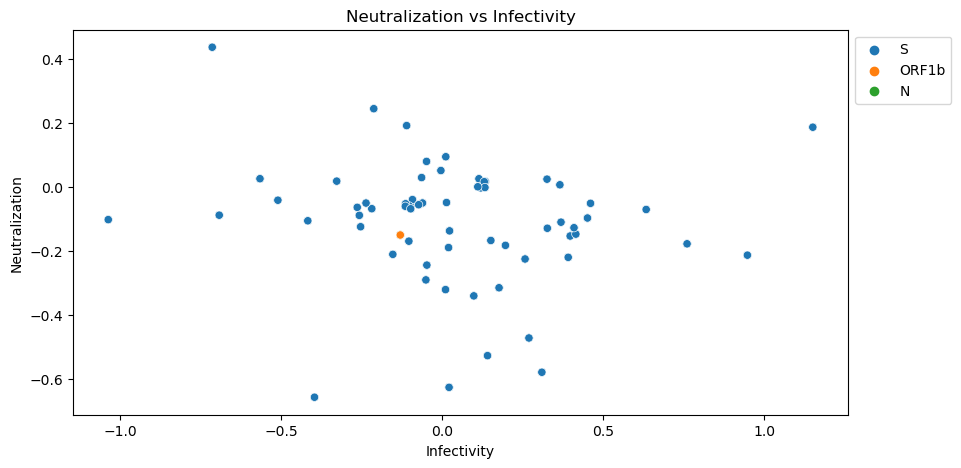

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = df,
                x = "Infectivity",
                y = "Neutralization",
                hue = "Category")

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title("Neutralization vs Infectivity")

In [74]:
ind = "Δ log R"

In [75]:
df["RunDate"].unique()

array(['2021-03-12T00:00:00.000000000', '2021-03-17T00:00:00.000000000',
       '2021-03-26T00:00:00.000000000', '2021-03-31T00:00:00.000000000',
       '2021-04-09T00:00:00.000000000', '2021-04-14T00:00:00.000000000',
       '2021-04-23T00:00:00.000000000', '2021-05-07T00:00:00.000000000',
       '2021-05-21T00:00:00.000000000', '2021-06-04T00:00:00.000000000',
       '2021-06-18T00:00:00.000000000', '2021-07-02T00:00:00.000000000',
       '2021-07-16T00:00:00.000000000', '2021-07-30T00:00:00.000000000',
       '2021-08-13T00:00:00.000000000', '2021-08-27T00:00:00.000000000',
       '2021-09-10T00:00:00.000000000', '2021-09-24T00:00:00.000000000',
       '2021-10-08T00:00:00.000000000', '2021-10-22T00:00:00.000000000',
       '2021-12-31T00:00:00.000000000', '2022-01-14T00:00:00.000000000',
       '2022-01-27T00:00:00.000000000', '2022-02-10T00:00:00.000000000',
       '2022-02-24T00:00:00.000000000', '2022-03-11T00:00:00.000000000',
       '2022-03-29T00:00:00.000000000', '2022-04-12

In [76]:
def correlation_plot(d):
    subset = df[df["RunDate"]==d]

    X_inf = subset[["Infectivity"]]
    X_neut = subset[["Neutralization"]]
    y = subset[f"{ind}"]
    
    model_inf = LinearRegression()
    model_inf.fit(X_inf,y)
    r2_inf = model_inf.score(X_inf, y)
    
    model_neut = LinearRegression()
    model_neut.fit(X_neut,y)
    r2_neut = model_neut.score(X_neut, y)  

    fig, ax = plt.subplots(ncols=2, figsize=(8,4))

    sns.scatterplot(X_inf["Infectivity"], y, ax=ax[0])
    ax[0].set_title(f"R^2 = {r2_inf}")
    ax[0].plot(X_inf["Infectivity"], model_inf.predict(X_inf), color='red', label='Line of Best Fit')
    sns.scatterplot(X_neut["Neutralization"], y, ax=ax[1])
    ax[1].set_title(f"R^2 = {r2_neut}")
    ax[1].plot(X_neut["Neutralization"], model_neut.predict(X_neut), color='red', label='Line of Best Fit')

    fig.suptitle(f"Date: {d}")

/Applications/anaconda3/envs/data_analysis_env/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/envs/data_analysis_env/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


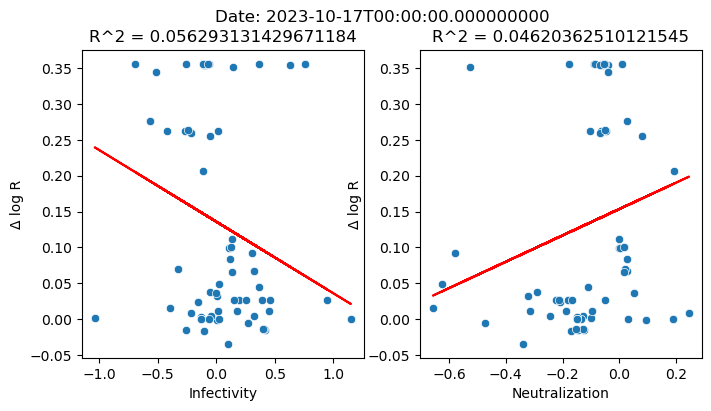

In [77]:
correlation_plot("2023-10-17T00:00:00.000000000")

In [87]:
date = []
intercept = []
inf = []
neut = []
r2 = []

for d in df["RunDate"].unique():
    subset = df[df["RunDate"]==d]
    X = subset[["Infectivity", "Neutralization"]]
    y = subset[f"{ind}"]
    model = LinearRegression()
    model.fit(X,y)
    r_squared = model.score(X, y)
    date.append(d)
    intercept.append(model.intercept_)
    inf.append(model.coef_[0])
    neut.append(model.coef_[1])
    r2.append(r_squared)
    
results_linreg = pd.DataFrame({"Date": date,
                               #"Intercept": intercept,
                               "Infectivity": inf,
                               "Neutralization": neut,
                               "R2": r2})

results_linreg = pd.melt(results_linreg, id_vars= ["Date"], var_name = "Metric", value_name = "Value")
results_linreg


,Date,Metric,Value
0,2021-03-12,Infectivity,0.022704
1,2021-03-17,Infectivity,0.022848
2,2021-03-26,Infectivity,0.023357
3,2021-03-31,Infectivity,0.023707
4,2021-04-09,Infectivity,0.022683
...,...,...,...
229,2024-01-04,R2,0.101012
230,2024-01-22,R2,0.101012
231,2024-02-05,R2,0.090628
232,2024-02-22,R2,0.004367


In [92]:
metric_palette = {"Intercept": "RoyalBlue",
                  "Infectivity": "DarkOrange",
                  "Neutralization": "ForestGreen"}

/var/folders/47/14w93qyx7xj7xrsd5bd9sfqr0000gp/T/ipykernel_83196/454869670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefs_linreg["Metric"] = pd.Categorical(coefs_linreg["Metric"], categories = ["Neutralization", "Infectivity"], ordered = True)


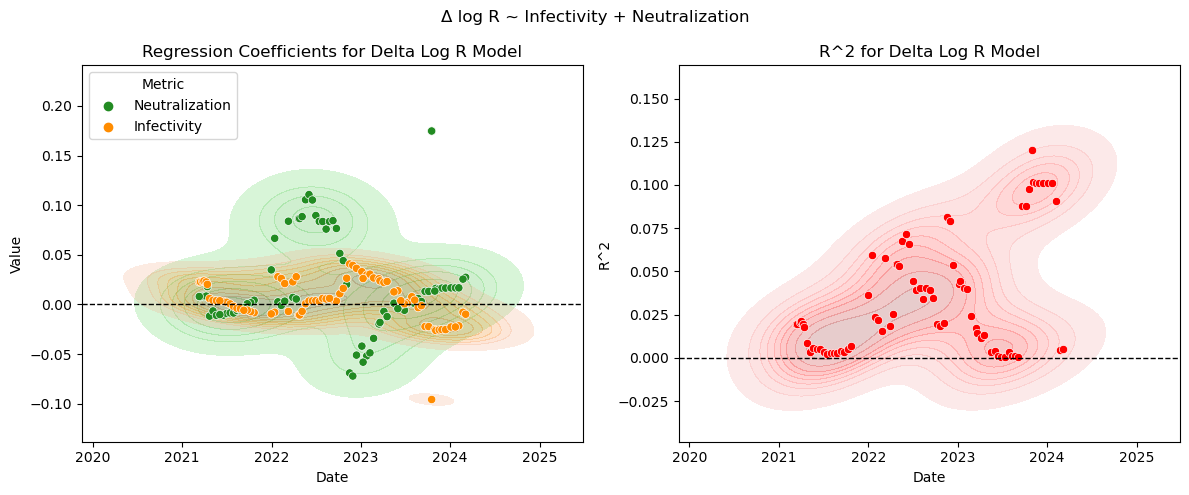

In [96]:
coefs_linreg = results_linreg[(results_linreg["Metric"]=="Infectivity")|(results_linreg["Metric"]=="Neutralization")]
coefs_linreg["Metric"] = pd.Categorical(coefs_linreg["Metric"], categories = ["Neutralization", "Infectivity"], ordered = True)
coefs_linreg = coefs_linreg.sort_values(by="Metric")
fig, ax = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(data=coefs_linreg, x="Date", y="Value", hue="Metric", palette=metric_palette, fill=True, alpha=0.25, ax=ax[0])


sns.scatterplot(data = coefs_linreg,
                x = "Date",
                y = "Value",
                hue = "Metric",
                palette = metric_palette,
                ax=ax[0])


ax[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
ax[0].set_title("Regression Coefficients for Delta Log R Model")

sns.kdeplot(data=results_linreg[results_linreg["Metric"]=="R2"], x="Date", y="Value", color="Red", fill=True, alpha=0.25, ax=ax[1])

sns.scatterplot(data = results_linreg[results_linreg["Metric"]=="R2"],
                x = "Date",
                y = "Value",
                color = "Red",
                ax=ax[1])


ax[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
ax[1].set_ylabel("R^2")
ax[1].set_title("R^2 for Delta Log R Model")

plt.suptitle(f"{ind} ~ Infectivity + Neutralization")
plt.tight_layout()


# Single Models

In [81]:
def run_linreg(df, expl):
    date = []
    intercept = []
    x = []
    r2 = []

    for d in df["RunDate"].unique():
        subset = df[df["RunDate"]==d]
        X = subset[[f"{expl}"]]
        y = subset[f"{ind}"]
        model = LinearRegression()
        model.fit(X,y)
        r_squared = model.score(X, y)
        date.append(d)
        #intercept.append(model.intercept_)
        x.append(model.coef_[0])
        r2.append(r_squared)
        
    results_linreg = pd.DataFrame({"Date": date,
                                #"Intercept": intercept,
                                f"{expl}": x,
                                "R2": r2})

    results_linreg = pd.melt(results_linreg, id_vars= ["Date"], var_name = "Metric", value_name = "Value")
    return results_linreg


def plot_scatter(results_linreg, expl):
    coefs_linreg = results_linreg[(results_linreg["Metric"]=="Intercept")|(results_linreg["Metric"]==f"{expl}")]

    fig, ax = plt.subplots(ncols=2,
                        figsize=(12,5))

    sns.scatterplot(data=coefs_linreg,
                    x="Date",
                    y="Value",
                    hue="Metric",
                    palette=metric_palette,
                    ax=ax[0])
    sns.kdeplot(data=coefs_linreg,
                x="Date",
                y="Value",
                hue="Metric",
                palette=metric_palette,
                fill=True,
                alpha=0.25,
                ax=ax[0])
    ax[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax[0].set_title(f"Regression Coefficients for {ind} vs {expl}")


    sns.scatterplot(data=results_linreg[results_linreg["Metric"]=="R2"],
                    x="Date",
                    y="Value",
                    color="Red",
                    ax=ax[1])
    sns.kdeplot(data=results_linreg[results_linreg["Metric"]=="R2"],
                x="Date",
                y="Value",
                color="Red",
                fill=True,
                alpha=0.25,
                ax=ax[1])
    ax[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
    #ax[1].set_ylim([-1, 1])
    ax[1].set_ylabel("R^2")
    ax[1].set_title(f"R^2 for {ind} vs {expl}")

    plt.suptitle(f"{ind} ~ {expl}")
    plt.tight_layout()

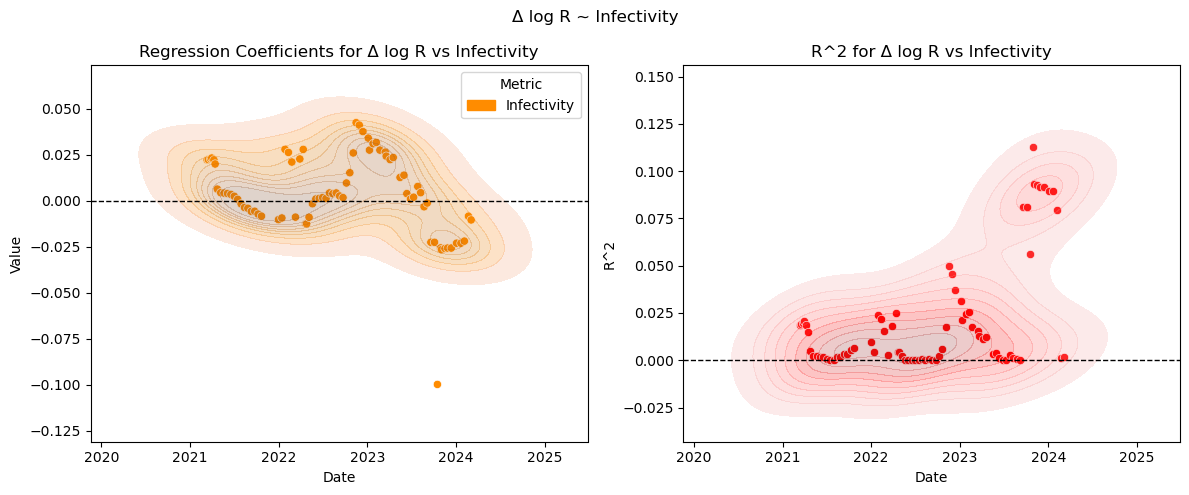

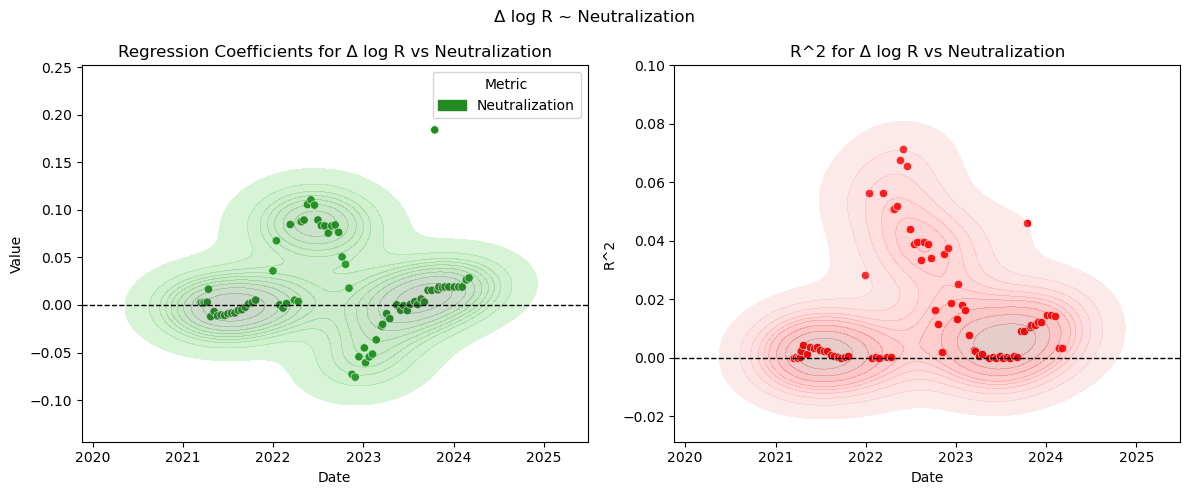

In [82]:
for e in ["Infectivity", "Neutralization"]:
    r = run_linreg(df, e)
    plot_scatter(r, e)